# Análisis de temperataturas
### Información
La base de datos que se va a analizar proviene de la **RNEAA** límitada a los meses de **Noviembre, Diciembre, Enero, Febrero y Marzo**. Se cuentan con datos desde **1 de Diciembre de 1997 hasta el 30 de Enero de 2018**.

* Tmin -39.6 hasta 44.7
* Tmax -34.5 hasta 60

## Procesamiento de Información

In [42]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
#######################################
# Script que permite el análisis del
dato de temperatura mínima de la RNEAA
# Author: Jorge Mauricio
# Email: jorge.ernesto.mauricio@gmail.com
# Date: 2018-02-01
# Version: 1.0
#######################################
"""
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [43]:
# funciones
def generarAnio(f):
	return f.split()[0].split('-')[0]

# crear columna mes
def generarMes(f):
	return f.split()[0].split('-')[1]

# crear columna dia
def generarDia(f):
	return f.split()[0].split('-')[2]

# funcion para generar estación meteorologica
def generarEstacion(m,d):
	m = int(m)
	d = int(d)
	if m == 12:
		if d >=21:
			return 'Invierno'
		else:
			return 'Otoño'
	if m == 1:
		return 'Invierno'
	if m == 2:
		return 'Invierno'
	if m == 3:
		if d <= 15:
			return 'Invierno'
		else:
			return 'Primavera'


In [44]:
# read csv
data = pd.read_csv('data/analisis_invierno_3.csv')

In [45]:
#info df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137642 entries, 0 to 3137641
Data columns (total 6 columns):
numero      int64
nombre      object
longitud    float64
latitud     float64
fecha       object
tmin        float64
dtypes: float64(3), int64(1), object(2)
memory usage: 143.6+ MB


In [46]:
# data count
data.count()

numero      3137642
nombre      3137642
longitud    3137642
latitud     3137642
fecha       3137642
tmin        2633956
dtype: int64

In [47]:
# eliminar datos nulos
data = data.dropna()

In [48]:
# integridad del DF
data.head()

,numero,nombre,longitud,latitud,fecha,tmin
0,2,La Mirinda,-102.251778,22.248528,2013-02-01 00:00:00,8.2
1,2,La Mirinda,-102.251778,22.248528,2013-02-02 00:00:00,4.6
2,2,La Mirinda,-102.251778,22.248528,2013-02-03 00:00:00,0.3
3,2,La Mirinda,-102.251778,22.248528,2013-02-04 00:00:00,1.6
4,2,La Mirinda,-102.251778,22.248528,2013-02-05 00:00:00,0.6


In [49]:
data['Año'] = data.apply(lambda x: generarAnio(x['fecha']), axis=1)

In [50]:
data['Mes'] = data.apply(lambda x: generarMes(x['fecha']), axis=1)

In [51]:
data['Día'] = data.apply(lambda x: generarDia(x['fecha']), axis=1)

In [52]:
# integridad db
data.head()

,numero,nombre,longitud,latitud,fecha,tmin,Año,Mes,Día
0,2,La Mirinda,-102.251778,22.248528,2013-02-01 00:00:00,8.2,2013,02,01
1,2,La Mirinda,-102.251778,22.248528,2013-02-02 00:00:00,4.6,2013,02,02
2,2,La Mirinda,-102.251778,22.248528,2013-02-03 00:00:00,0.3,2013,02,03
3,2,La Mirinda,-102.251778,22.248528,2013-02-04 00:00:00,1.6,2013,02,04
4,2,La Mirinda,-102.251778,22.248528,2013-02-05 00:00:00,0.6,2013,02,05


In [53]:
data['Estación'] = data.apply(lambda x: generarEstacion(x['Mes'], x['Día']), axis=1)

In [54]:
# estructura bd
data.head()

,numero,nombre,longitud,latitud,fecha,tmin,Año,Mes,Día,Estación
0,2,La Mirinda,-102.251778,22.248528,2013-02-01 00:00:00,8.2,2013,02,01,Invierno
1,2,La Mirinda,-102.251778,22.248528,2013-02-02 00:00:00,4.6,2013,02,02,Invierno
2,2,La Mirinda,-102.251778,22.248528,2013-02-03 00:00:00,0.3,2013,02,03,Invierno
3,2,La Mirinda,-102.251778,22.248528,2013-02-04 00:00:00,1.6,2013,02,04,Invierno
4,2,La Mirinda,-102.251778,22.248528,2013-02-05 00:00:00,0.6,2013,02,05,Invierno


In [55]:
# filtrar información
data = data.loc[data['Estación'] == 'Invierno']

## Tmin

In [56]:
# media de tmin anual
plt.style.use('ggplot')
data.groupby('Año').mean()['tmin']

Año
1997    3.918182
1998    4.745455
1999    5.151562
2000    6.125131
2001    8.823200
2002    4.706046
2003    5.018102
2004    4.589177
2005    4.734400
2006    5.441257
2007    7.849633
2008    7.621620
2009    8.880452
2010    8.711182
2011    8.355837
2012    9.226624
2013    7.835983
2014    7.765035
2015    8.612380
2016    7.349264
2017    7.494330
2018    5.816897
Name: tmin, dtype: float64

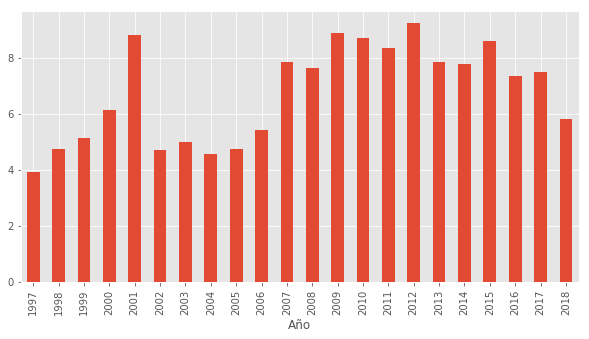

In [57]:
data.groupby('Año').mean()['tmin'].plot.bar(figsize=(10,5))

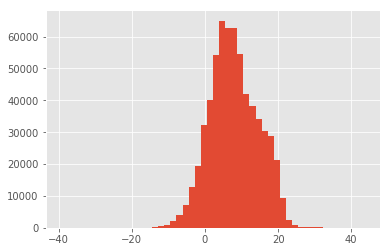

In [58]:
data['tmin'].hist(bins=50)

In [59]:
dataAnio = data.groupby(['longitud','latitud','Año']).mean()['tmin']

In [60]:
dataAnio.head()

longitud     latitud    Año 
-116.860285  32.101629  2015    5.353636
                        2016    7.854186
                        2017    6.785385
                        2018    8.389667
-116.161000  31.252000  2015    2.527273
Name: tmin, dtype: float64

In [61]:
dataAnio.to_csv('data/dataPorUbicacion_Anios.csv')

In [66]:
dataA = pd.read_csv('data/dataPorUbicacion_Anios.csv', header=None)

In [67]:
dataA.head()

,0,1,2,3
0,-116.860285,32.101629,2015,5.353636
1,-116.860285,32.101629,2016,7.854186
2,-116.860285,32.101629,2017,6.785385
3,-116.860285,32.101629,2018,8.389667
4,-116.161000,31.252000,2015,2.527273


In [68]:
cols = ['longitud','latitud','Año','Tmin']

In [71]:
dataA.columns = cols

In [72]:
# límites del mapas
LONG_MAX = -86.1010
LONG_MIN = -118.2360
LAT_MAX = 33.5791
LAT_MIN = 12.37

/Users/jorgemauricio/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


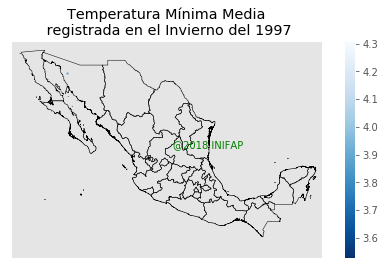

In [75]:
for i in dataA['Año'].unique():
    # configuración del mapas
    plt.clf()
    fig = plt.figure(figsize=(8,4))
    m = Basemap(projection='mill',llcrnrlat=LAT_MIN,urcrnrlat=LAT_MAX,llcrnrlon=LONG_MIN,urcrnrlon=LONG_MAX,resolution='h')

    # filtrar información por años
    dataTemporal = dataA.loc[dataA['Año'] == i]
    x = np.array(dataTemporal['longitud'])
    y = np.array(dataTemporal['latitud'])
    z = np.array(dataTemporal['Tmin'])

    # agregar shapes
    m.readshapefile('shapes/Estados', 'Estados')

    # agregar puntos
    m.scatter(x,y, latlon=True, s=3,c=z, cmap='Blues_r')

    # crear anotación
    latitudAnotacion = (LAT_MAX + LAT_MIN) / 2
    longitudAnotacion = (LONG_MAX + LONG_MIN) / 2
    plt.annotate('@2018 INIFAP', xy=(longitudAnotacion,latitudAnotacion), xycoords='figure fraction', xytext=(0.45,0.45), color='g')
    plt.title(f"Temperatura Mínima Media\n registrada en el Invierno del {i}")
    plt.colorbar()
    temp = f"maps/Tmin_{i}.png"
    plt.savefig(temp, dpi=300)

## Imagenes

![1997](maps/Tmin_1997.png)